## TASK - 4
## PRODIGY_DS_04
### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [26]:
# Install required packages
!pip install wordcloud nltk

In [28]:
#Importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


In [29]:
# Download VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [30]:
df=pd.read_csv('twitter_training.csv')
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [35]:
# Rename columns for easier access
df.columns = ['ID', 'Game', 'Sentiment', 'Tweet']
df.head()

,ID,Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [36]:
# Drop the 'ID' and 'Game' columns as they are not needed for sentiment analysis
df = df.drop(columns=['ID', 'Game'])

In [38]:
# Check for any missing values
df = df.dropna()
df.head()

,Sentiment,Tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [39]:
# Text Preprocessing Function
def preprocess_text(text):
    # Remove punctuation, numbers, and special characters
    text = text.str.replace('[^a-zA-Z]', ' ', regex=True)
    # Convert to lowercase
    text = text.str.lower()
    return text

In [40]:
# Apply the preprocessing function to the 'Tweet' column
df['Tweet'] = preprocess_text(df['Tweet'])


In [41]:
# Display the preprocessed data
print(df.head())

  Sentiment                                              Tweet
0  Positive  i am coming to the borders and i will kill you...
1  Positive  im getting on borderlands and i will kill you ...
2  Positive  im coming on borderlands and i will murder you...
3  Positive  im getting on borderlands   and i will murder ...
4  Positive  im getting into borderlands and i can murder y...


In [42]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [43]:
# Function to get sentiment scores
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [45]:
# Apply sentiment analysis
df['Predicted_Sentiment'] = df['Tweet'].apply(get_sentiment)


In [46]:
# Display sentiment distribution
sentiment_counts = df['Predicted_Sentiment'].value_counts()
print(sentiment_counts)

Predicted_Sentiment
Positive    34376
Negative    27150
Neutral     12469
Name: count, dtype: int64


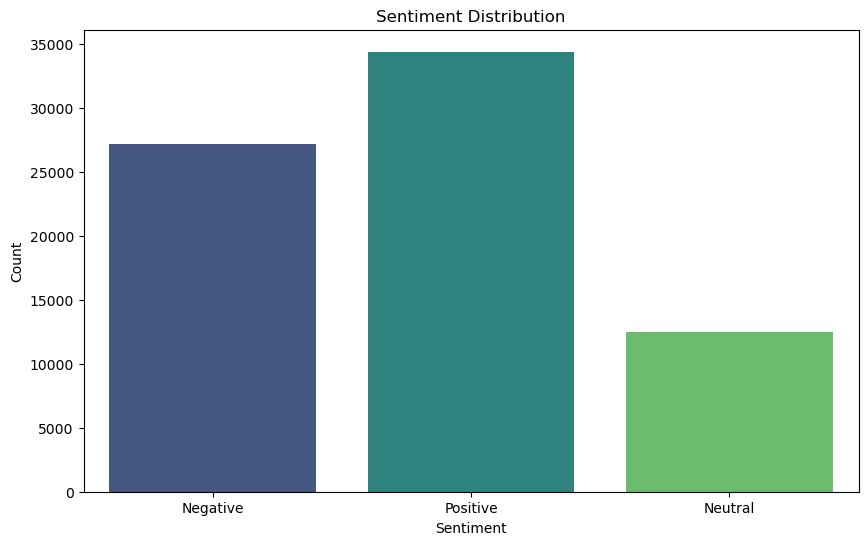

In [47]:
# Visualize sentiment distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Predicted_Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

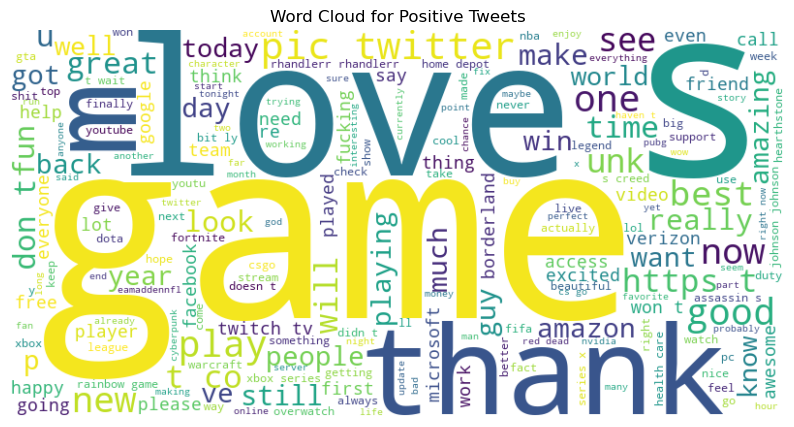

In [48]:
# Generate a word cloud for positive tweets
positive_tweets = ' '.join(df[df['Predicted_Sentiment'] == 'Positive']['Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()


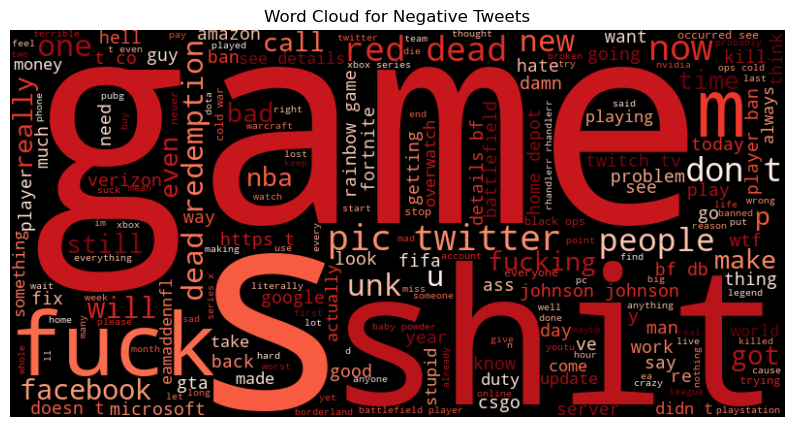

In [73]:
# Generate a word cloud for negative tweets
negative_tweets = ' '.join(df[df['Predicted_Sentiment'] == 'Negative']['Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_tweets)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()